In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

C:\heejae\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


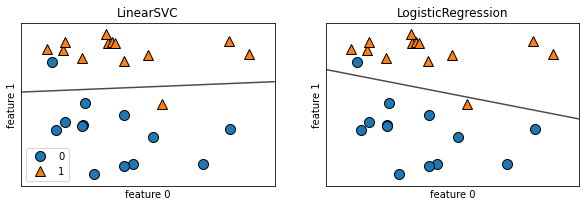

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig,axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X,fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()

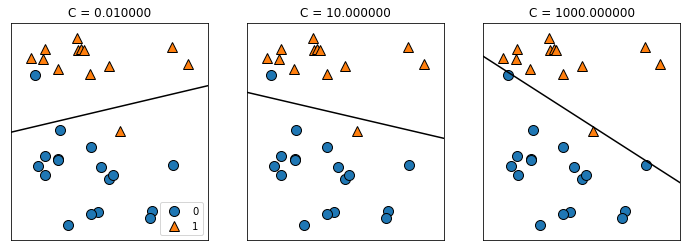

In [3]:
mglearn.plots.plot_linear_svc_regularization()

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)

print("train set score:",logreg.score(X_train,y_train))
print("train set score:",logreg.score(X_test,y_test))

train set score: 0.9577464788732394
train set score: 0.958041958041958


In [5]:
logreg100 = LogisticRegression(C=100,max_iter=5000).fit(X_train, y_train)

print("train set score:",logreg100.score(X_train,y_train))
print("train set score:",logreg100.score(X_test,y_test))

train set score: 0.9835680751173709
train set score: 0.965034965034965


In [6]:
logreg001 = LogisticRegression(C=0.01,max_iter=5000).fit(X_train, y_train)

print("train set score:",logreg001.score(X_train,y_train))
print("train set score:",logreg001.score(X_test,y_test))

train set score: 0.9530516431924883
train set score: 0.951048951048951


In [7]:
logreg100.coef_.shape

(1, 30)

In [8]:
logreg100.coef_.T.shape

(30, 1)

In [9]:
logreg100.coef_

array([[ 2.80361764e+00,  1.50866706e-01, -3.15187045e-01,
        -1.90480391e-03, -4.64501906e+00,  1.17934175e+00,
        -3.19379232e+00, -6.80602073e+00, -5.56716567e+00,
         4.69917385e-01,  8.74500675e-01,  3.20575044e+00,
        -3.76355179e-01, -1.36994237e-01, -6.74815482e-01,
         6.63022661e+00,  8.52860872e+00, -3.94720748e-01,
         1.21486266e+00,  1.09478407e+00,  1.09939553e+00,
        -5.40800131e-01,  7.16641728e-02, -2.76905684e-02,
        -8.75878980e+00,  1.49970601e+00, -4.39556256e+00,
        -1.44258070e+01, -8.41111731e+00,  4.92954067e-01]])

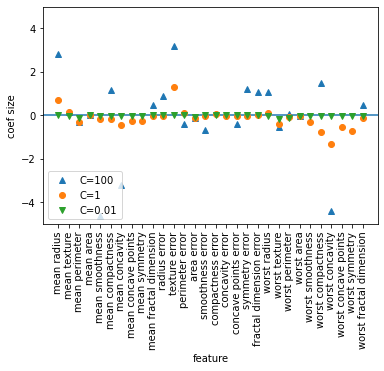

In [10]:
plt.plot(logreg100.coef_.T, '^',label="C=100")
plt.plot(logreg.coef_.T, 'o',label="C=1")
plt.plot(logreg001.coef_.T, 'v',label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("feature")
plt.ylabel("coef size")
plt.legend(loc=3)

In [11]:
cancer.data.shape

(569, 30)

C=0.001 -> 0.9131455399061033
C=0.001 -> 0.9230769230769231
C=1 -> 0.960093896713615
C=1 -> 0.958041958041958
C=100 -> 0.9859154929577465
C=100 -> 0.9790209790209791


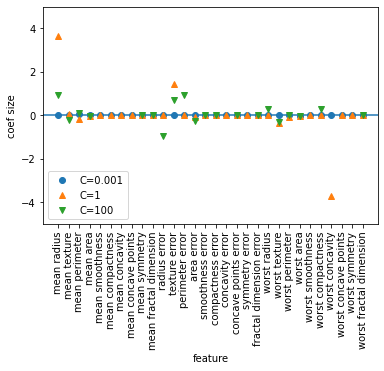

In [12]:
for C, marker in zip([0.001,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000)\
            .fit(X_train, y_train)
    print(f'C={C} -> {lr_l1.score(X_train, y_train)}')
    print(f'C={C} -> {lr_l1.score(X_test, y_test)}')
    plt.plot(lr_l1.coef_.T,marker, label=f"C={C}")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("feature")
plt.ylabel("coef size")
plt.legend(loc=3)


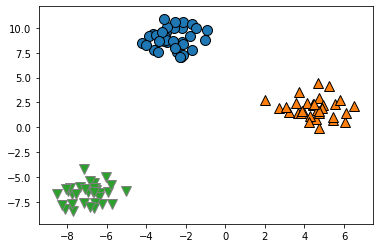

In [13]:
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:, 1], y)


In [14]:
linear_svm = LinearSVC().fit(X,y)
print(f'coef list size: {linear_svm.coef_.shape}')
print(f'coef list size: {linear_svm.intercept_.shape}')

coef list size: (3, 2)
coef list size: (3,)


Text(0, 0.5, 'feature 1')

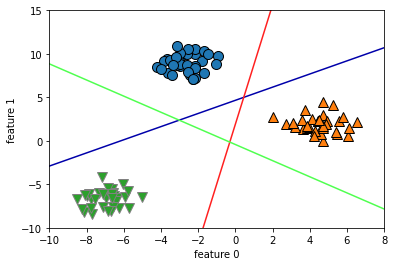

In [17]:
mglearn.discrete_scatter(X[:,0],X[:, 1], y)
line = np.linspace(-15,15)

for coef, intercept,color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("feature 0")
plt.ylabel("feature 1")